In [25]:
from IPython.display import Image

# Solving 1-D Schrodinger equation with Woods–Saxon potential


Time dependent Schrodinger equation
\begin{equation*}
-\frac{\hbar^2}{2m}\nabla^2\psi(x,t) + V \psi(x,t) = i\hbar\frac{\partial}{\partial t}\psi(x,t)
\end{equation*}
But we will solve only  the time-independent Schrödinger equation $t=t_0$
\begin{equation*}
-\frac{\hbar^2}{2m}\nabla^2\psi(x) + V \psi(x) = E\psi(x),
\end{equation*}
where $\nabla^2=\frac{d^2}{d x^2}$.

## Finite Difference Method
The finite difference method is an approach to solve differential equations numerically. The crux of the scheme lies in approximating the differential operator by simple differences.
The definition of a derivative is in the form of a limit
\begin{equation*}
\frac{dy(x)}{dx} \equiv \lim_{h\to 0} \left(\frac{y(x+h)-y(x)}{h}\right).
\end{equation*}
 The 1-D Laplace operator  $\nabla^2=\frac{d^2}{d x^2}$ can be expressed in terms of a matrix
\begin{align*}
\frac{\partial^2}{\partial x^2} y(x)
&= 
\frac{1}{dx} \left[ \frac{y_{n+1} - y_{n}}{dx} - \frac{y_{n} - y_{n-1}}{dx} \right]
\\
&=
\frac{y_{n+1} - 2 y_{n} + y_{n-1}}{(dx)^2} 
\\
&=
\frac{1}{(dx)^2}
\begin{pmatrix}
  -2  &  1  &  0  &  0 &  0 \\
   1  & -2  &  1  &  0 &  0 \\
   0  &  1  & -2  &  1 &  0 \\
   0  &  0  &  1  & -2 &  1 \\
   0  &  0  &  0  &  1 & -2 
\end{pmatrix}
\cdot
\begin{pmatrix}
   y_1   \\
   y_2   \\
   y_3   \\
   y_4   \\
   y_5  
\end{pmatrix}
\\
&\equiv
\mathbf{D2} \cdot \mathbf{y}
\end{align*}
Finally, the method can also be applied to time dependent problems, but as we want to solve the time independent Schrödinger equation, we will not address this topic here. Hopefully, it is more clear now how we can use finite differences to approximate differential operators, we didn’t talk what the numerical solution of a problem using such approximations actually looks like. 
\begin{equation*}
\dfrac{\partial^2}{\partial x^2}\psi(x) -\dfrac{2m}{\hbar^2}V\psi(x) = -\dfrac{2m}{\hbar^2}E\psi(x)
\end{equation*}
We discretize the domain using a regular step of size $h$. The desired solution is the list of values $\psi(0),\ \psi(h),\ \psi(2h),\ \dots,\ \psi((N + 1)h)$ , which we can index using an integer $i$. For each of these values, we can write down an equation of the form
\begin{equation*}
\dfrac{\partial^2}{\partial x^2}\psi_i  -\dfrac{2m}{\hbar^2}V\psi_i= -\dfrac{2m}{\hbar^2}E\psi_i \quad \quad \forall i \in \left\{ 1, \dots, N\right\}
\end{equation*}
where $N + 2$ is the total number of points in the discretized domain. Using the approximation of the second derivative shown above, we have that
This system of equations can be regarded as a single matrix equation

\begin{equation*}
\left(
\begin{pmatrix}
 -2 & \ \ 1 & & & & \\ \ \ 1 & -2 &\ \ 1 & & & \\ &\ \ 1 & -2 & \ddots & & \\ & & \ddots & \ddots &\ \ 1 \\ & & & \ \ 1 & -2
\end{pmatrix}
+ -\dfrac{2m}{\hbar^2}V
\begin{pmatrix}
 1 & \ \ 0 & & & & \\ \ \ 0 & 1&\ \ 0 & & & \\ &\ \ 0 & 1 & \ddots & & \\ & & \ddots & \ddots &\ \ 0 \\ & & & \ \ 0 & 1
\end{pmatrix}
 \right) 
  \cdot 
\begin{pmatrix}\psi_1 \\ \psi_2 \\ \psi_3 \\ \vdots \\ \psi_{N}\end{pmatrix}= -\dfrac{2m E}{\hbar^2} \begin{pmatrix}\psi_1 \\ \psi_2\\ \psi_3 \\ \vdots \\ \psi_{N} 
\end{pmatrix}
\end{equation*}



which is in the form of an eigenvalue problem. Solving the eigenproblem, we find a set of eigenvectors $\psi$ representing the solution, and a corresponding set of eigenvalues $\frac{2m E}{\hbar^2}$ which represent the appropriately scaled energy levels.


## Wood-Saxon potential

\begin{equation*}
V=v_{ws}(r)+v_{C}(r)+v_{LS}(r)\textbf{L}\cdot\textbf{S}
\end{equation*}

The Coulombic part of the potential $v_{C}(r)$ is

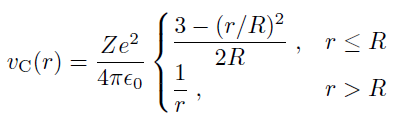

In [26]:
Image(filename='img/columb.png')

The Wood-saxon potential $v_{ws}(r)$ is

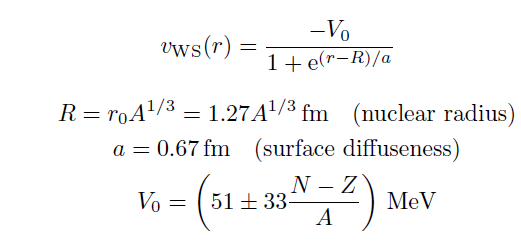

In [27]:
Image(filename='img/wood.png')

The spin–orbit term $v_{LS}(r)$ is

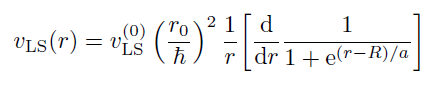

In [28]:
Image(filename='img/LS.png')